In [2]:
# Import Libraries

import pandas as pd
import os
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import mpu

%matplotlib inline

In [14]:
path="D:\\GA Work_Essia\\Data\\Data Files\\Trip Data\\2019\\"
files=[file for file in os.listdir(path)]
All_2019_data=pd.DataFrame()
for file in files:
    df=pd.read_csv(path+file)
    All_2019_data=pd.concat([All_2019_data,df])
    
All_2019_data.to_csv("D:\\GA Work_Essia\\Data\\Data Files\\Trip Data\\2019\\All_2019_data.csv",index=False)

In [3]:
All_2019_data=pd.read_csv('D:\\GA Work_Essia\\Data\\Data Files\\Trip Data\\2019\\All_2019_data.csv')
All_2019_data.head()

C:\Users\Swap\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type
0,112536773,7,2019-01-01 00:07:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,06468,1,One Way,Walk-up,standard
1,112536772,6,2019-01-01 00:08:00,2019-01-01 00:14:00,3046,34.052872,-118.24749,3051,34.045422,-118.253517,12311,1,One Way,Walk-up,standard
2,112538689,32,2019-01-01 00:18:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05992,1,One Way,Walk-up,standard
3,112538688,30,2019-01-01 00:20:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,05860,1,One Way,Walk-up,standard
4,112538687,28,2019-01-01 00:22:00,2019-01-01 00:50:00,3030,34.051941,-118.24353,3075,34.042110,-118.256187,06006,1,One Way,Walk-up,standard


In [4]:
#Change datatype
    
All_2019_data["start_time"]=pd.to_datetime(All_2019_data['start_time'])
All_2019_data["end_time"]=pd.to_datetime(All_2019_data['end_time'])

In [5]:
#check datatype

All_2019_data.dtypes

trip_id                         int64
duration                        int64
start_time             datetime64[ns]
end_time               datetime64[ns]
start_station                   int64
start_lat                     float64
start_lon                     float64
end_station                     int64
end_lat                       float64
end_lon                       float64
bike_id                        object
plan_duration                   int64
trip_route_category            object
passholder_type                object
bike_type                      object
dtype: object

In [6]:
#extract hour from time

All_2019_data["start_hour"]=All_2019_data["start_time"].dt.hour
All_2019_data["end_hour"]=All_2019_data["end_time"].dt.hour
# Find day name

All_2019_data["weekday"]=All_2019_data["start_time"].dt.weekday_name

In [7]:
# Select specific columns from dataset

All_2019_data=All_2019_data[['start_station','start_hour','weekday','end_station','end_hour','duration','bike_id','passholder_type','plan_duration','trip_route_category','bike_type']]
All_2019_data.head()

,start_station,start_hour,weekday,end_station,end_hour,duration,bike_id,passholder_type,plan_duration,trip_route_category,bike_type
0,3046,0,Tuesday,3051,0,7,06468,Walk-up,1,One Way,standard
1,3046,0,Tuesday,3051,0,6,12311,Walk-up,1,One Way,standard
2,3030,0,Tuesday,3075,0,32,05992,Walk-up,1,One Way,standard
3,3030,0,Tuesday,3075,0,30,05860,Walk-up,1,One Way,standard
4,3030,0,Tuesday,3075,0,28,06006,Walk-up,1,One Way,standard


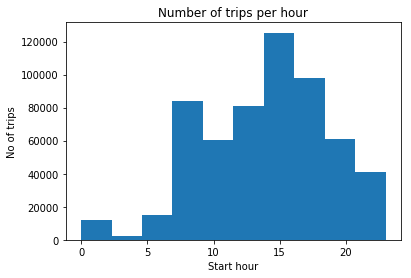

In [8]:
# Histogram for number of trips

fig, ax = plt.subplots()
ax.hist(All_2019_data['start_hour'],range=(0,23))
ax.set_title('Number of trips per hour')
plt.xlabel('Start hour')
plt.ylabel('No of trips')
plt.show()

In [ ]:
# Histogram for weekday

fig, ax = plt.subplots()
ax.hist(All_2019_data['weekday'],range=(0,7))
ax.set_title('Number of trips per day')
plt.xlabel('Weekday')
plt.ylabel('No of trips')
plt.show()

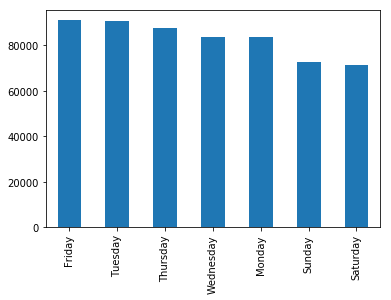

In [10]:
All_2019_data['weekday'].value_counts().plot(kind="bar")

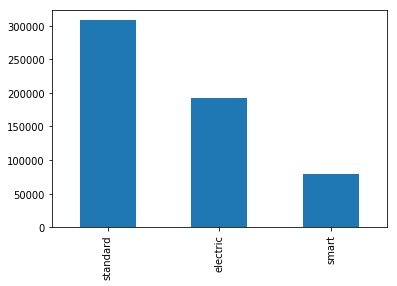

In [12]:
All_2019_data['bike_type'].value_counts().plot(kind="bar")